<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/Lazy-predict/lazy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/monsegutier/Grupo4-PP1--Proyecto-ML/main/data/heart.csv')

In [ ]:
# Verificación del set de datos

print('### primeras 5 lineas ###','\n')
df.head()

### primeras 5 lineas ### 



,Edad,Genero,Dolor en pecho,Presión arterial reposo,Colesterol,Glucemia,Resultado ECC Reposo,Frecuencia Cardiaca,Angina por ejercicio,Depresión de ST,Pendiente ST,Numero de vasos,Talasemia,Diagnostico
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [ ]:
# Datos Nulos: verificación

print('### Datos nulos en el dataset ###','\n')
df.isnull().sum().sum

### Datos nulos en el dataset ### 



<bound method NDFrame._add_numeric_operations.<locals>.sum of Edad                       0
Genero                     0
Dolor en pecho             0
Presión arterial reposo    0
Colesterol                 0
Glucemia                   0
Resultado ECC Reposo       0
Frecuencia Cardiaca        0
Angina por ejercicio       0
Depresión de ST            0
Pendiente ST               0
Numero de vasos            0
Talasemia                  0
Diagnostico                0
dtype: int64>

In [ ]:
# Características numéricas

df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
Colesterol,303.000000,246.264026,51.830751,126.000000,211.000000,240.000000,274.500000,564.000000
Frecuencia Cardiaca,303.000000,149.646865,22.905161,71.000000,133.500000,153.000000,166.000000,202.000000
Presión arterial reposo,303.000000,131.623762,17.538143,94.000000,120.000000,130.000000,140.000000,200.000000
Edad,303.000000,54.366337,9.082101,29.000000,47.500000,55.000000,61.000000,77.000000
Depresión de ST,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000
Dolor en pecho,303.000000,0.966997,1.032052,0.000000,0.000000,1.000000,2.000000,3.000000
Numero de vasos,303.000000,0.729373,1.022606,0.000000,0.000000,0.000000,1.000000,4.000000
Pendiente ST,303.000000,1.399340,0.616226,0.000000,1.000000,1.000000,2.000000,2.000000
Talasemia,303.000000,2.313531,0.612277,0.000000,2.000000,2.000000,3.000000,3.000000
Resultado ECC Reposo,303.000000,0.528053,0.525860,0.000000,0.000000,1.000000,1.000000,2.000000


In [ ]:
# EDA diagnostico = 0 sin posibilidad de ataque cardiaco, 1= grandes posibilidades de ataques cardiacos
df['Diagnostico'].value_counts()

1    165
0    138
Name: Diagnostico, dtype: int64

In [ ]:
# Tipos de Dolor de Pecho
# 0 Angina
# 1 Angina Atipica
# 2 Dolor no de Angina
# 3 Asintomático
df['Dolor en pecho'].value_counts()


0    143
2     87
1     50
3     23
Name: Dolor en pecho, dtype: int64

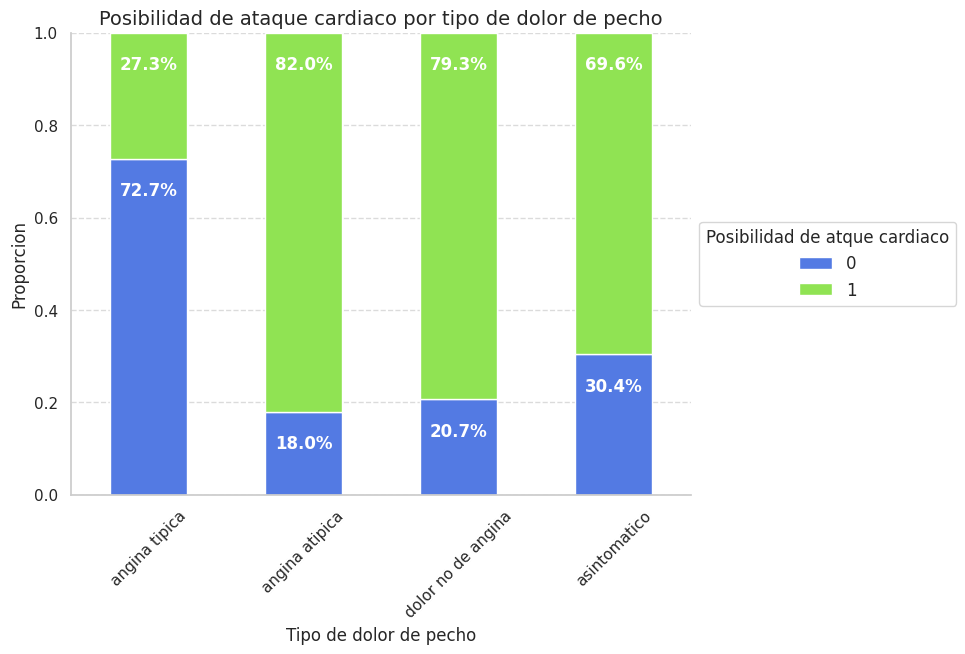

In [ ]:
import matplotlib.pyplot as plt
colors = ["#537AE3", "#90E353"]
cross_tab = pd.crosstab(df['Dolor en pecho'], df['Diagnostico'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Tipo de dolor de pecho', fontsize=12)
ax.set_ylabel('Proporcion', fontsize=12)
ax.set_title('Posibilidad de ataque cardiaco por tipo de dolor de pecho', fontsize=14)
ax.legend(title='Posibilidad de atque cardiaco', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3], ["angina tipica", "angina atipica", "dolor no de angina", "asintomatico"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

In [ ]:
df['Genero'].value_counts()

1    207
0     96
Name: Genero, dtype: int64

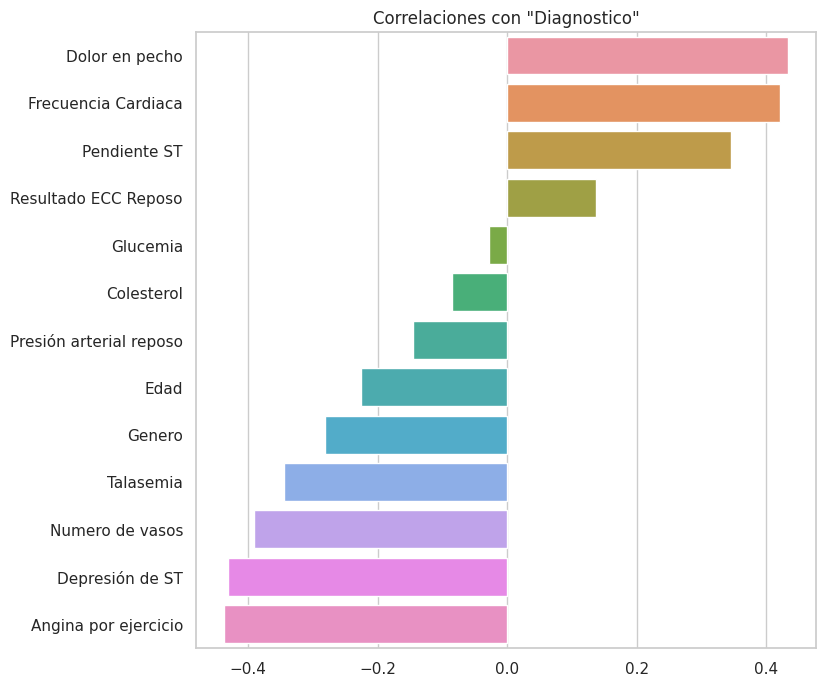

In [ ]:
# Correlaciones Pearson
import seaborn as sns
limit = -1.0

data = df.corr()["Diagnostico"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=corr, y=labels, ax=ax)
plt.title('Correlaciones con "Diagnostico"')
plt.show()

In [ ]:
# Escalado de datos. Se decide  trabaar con Standar Scaler por la ausencia de outliers. Se deja el split en 0.80
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.drop(columns="Diagnostico")
y = df["Diagnostico"]

scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=123)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (242, 13)
X Test  :  (61, 13)
Y Train :  (242,)
Y Test  :  (61,)


In [ ]:
# LazyClassifier
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=123,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.84,0.84,0.84,0.84,0.01
QuadraticDiscriminantAnalysis,0.82,0.82,0.82,0.82,0.02
NearestCentroid,0.79,0.79,0.79,0.79,0.04
LabelSpreading,0.79,0.79,0.79,0.79,0.02
KNeighborsClassifier,0.79,0.79,0.79,0.79,0.02
LabelPropagation,0.79,0.79,0.79,0.79,0.02
BernoulliNB,0.79,0.79,0.79,0.79,0.01
SGDClassifier,0.77,0.77,0.77,0.77,0.02
ExtraTreesClassifier,0.77,0.77,0.77,0.77,0.14


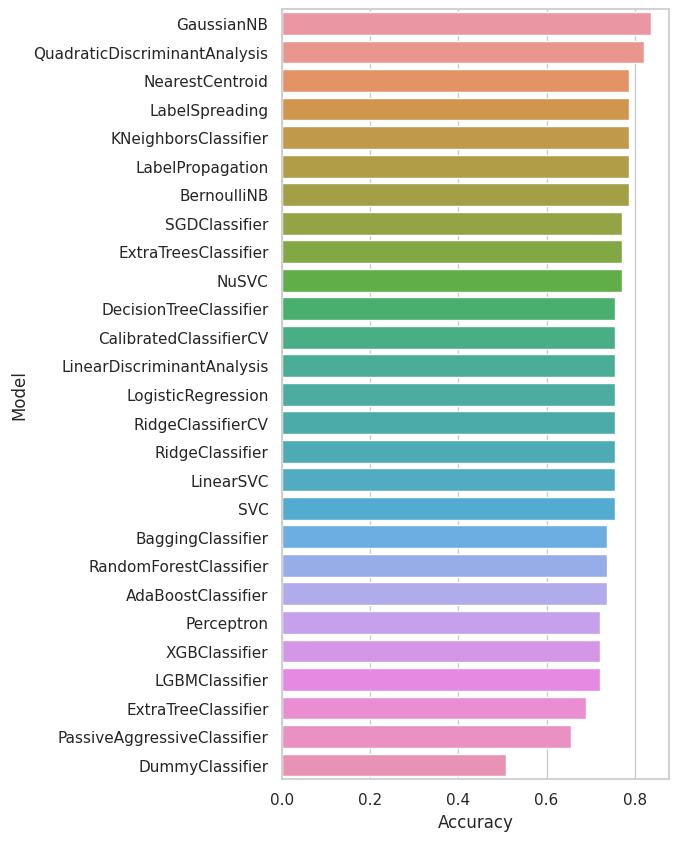

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

Luego de verificar el desmepeño de los diferentes clasificadores de verifica que Naive Bayes es el mejor en la lista